In [175]:
%load_ext autoreload
%autoreload 2
from Project import Project

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

import os

## BETA Dataset

Sample function : $$ s(f, \Phi, i) = \dfrac{\sin{[2\pi f (i/\text{RefreshRate}) + \Phi]}}{2} $$

where $\text{RefreshRate} = 60 Hz$ and the indexed frequency and phase values can be obtained by

$$ f_k = f_0 + (k-1)\cdot \Delta f \\ \Phi_k = \Phi_0 + (k - 1)\cdot \Delta \Phi$$

for $f_0 = 8 Hz, \Phi_0 = 0$ and $\Delta f = 0.2 Hz, \Delta \Phi = 0.5 \cdot \pi$

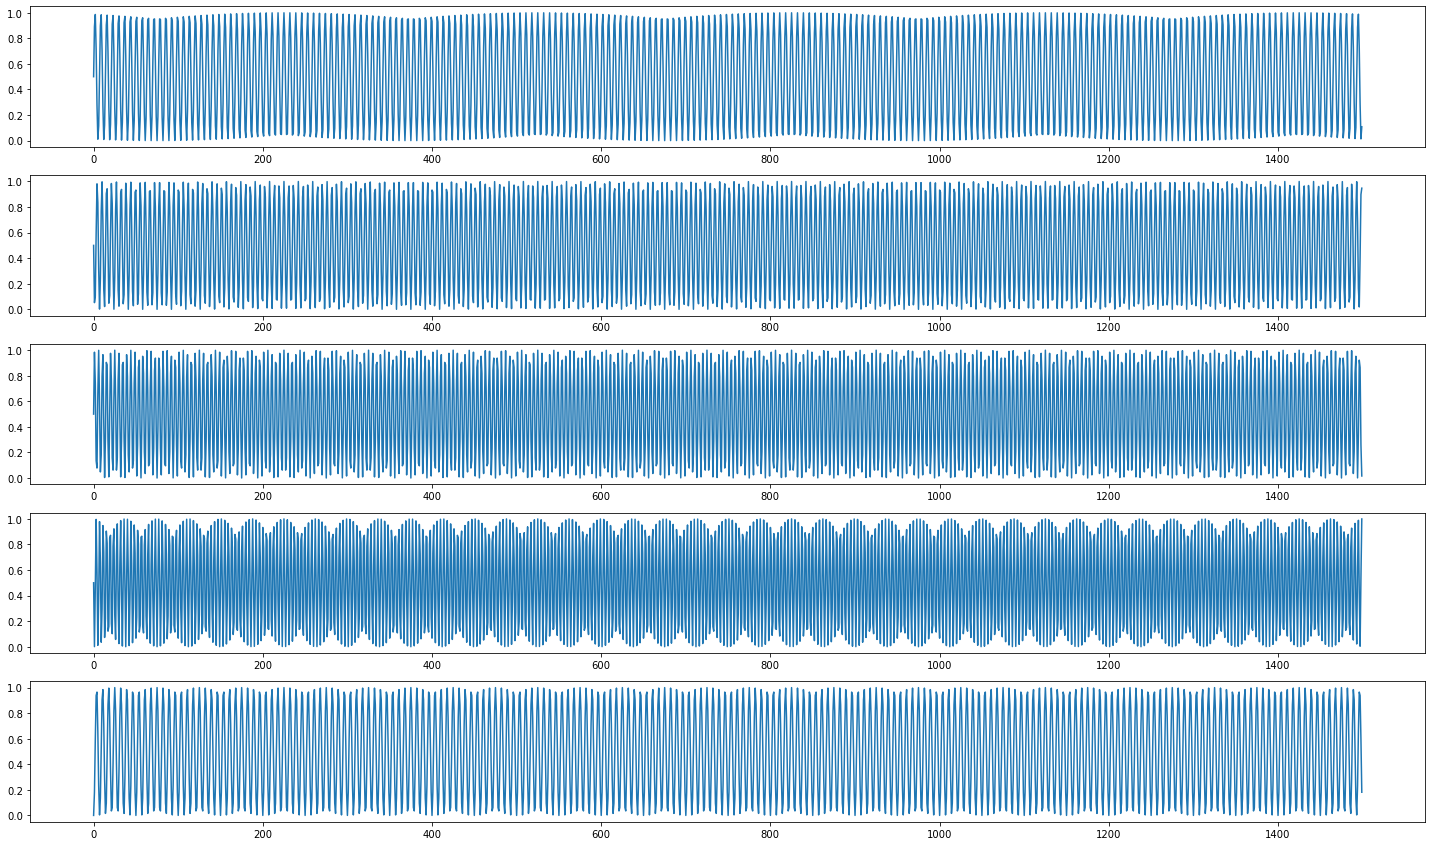

In [318]:
def stimulus(f : float, phi : float, length : int) -> np.array:
    return np.array([0.5*( 1 + np.sin(2*np.pi*f*(i/60) + phi) ) for i in range(length)])

# def f_k(k):
#     return 8 + (k - 1)*0.2
# def phi_k(k):
#     return 0 + (0.5*(k-1))%2*np.pi

frequency = np.array([ 8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6,10.8, 11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2, 13.4, 13.6, 13.8, 14. ,
                      14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8,  8. ,  8.2,  8.4])
phases = np.array([0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 
                   3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 
                   0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898])

signal_length = 1500
stimulus_matrix = np.array([stimulus(f, phi, signal_length) for f, phi in zip(frequency, phases)]) # This will be used later after i parsed the information of each subject
# stimulus_matrix = np.array([stimulus(f_k(k), phi_k(k), signal_length) for k in range(1, 40 + 1)])

fig, ax = plt.subplots(nrows = 5, ncols = 1)
fig.set_size_inches(25, 15)

ax[0].plot(range(signal_length), stimulus_matrix[0])
ax[1].plot(range(signal_length), stimulus_matrix[10])
ax[2].plot(range(signal_length), stimulus_matrix[20])
ax[3].plot(range(signal_length), stimulus_matrix[30])
ax[4].plot(range(signal_length), stimulus_matrix[39])

In [192]:
files = [file for file in os.listdir(Project.tsinghua_raw_dir) if "mat" in file]

In [310]:
subject = scipy.io.loadmat(Project.tsinghua_raw_dir / files[1])['data'][0][0]
subject_info = [x for x in subject[1][0][0]]
data = subject[0]
# for i in range(70):
#     subject = scipy.io.loadmat(Project.tsinghua_raw_dir / files[i])
#     print(subject['data'][0][0][0].shape)

In [311]:
subject_info # Create a parser for this info
# Identification
# Age
# Gender
# Electrode Positions
# Frequencies (Verify if for all subjects their order are equal)
    #  dot, comma, backspace, a, b, c, ..., 0, 1, ..., 9, space
# Phases (Verify if for all subjects their order are equal)
    #  dot, comma, backspace, a, b, c, ..., 0, 1, ..., 9, space
# ??
# ??
# ??
# Sampling Rate

[array(['S10'], dtype='<U3'),
 array([[20.08333333]]),
 array(['female'], dtype='<U6'),
 array([[array(['1'], dtype='<U1'), array(['-17.926'], dtype='<U7'),
         array(['0.51499'], dtype='<U7'), array(['FP1'], dtype='<U3')],
        [array(['2'], dtype='<U1'), array(['0'], dtype='<U1'),
         array(['0.50669'], dtype='<U7'), array(['FPZ'], dtype='<U3')],
        [array(['3'], dtype='<U1'), array(['17.926'], dtype='<U6'),
         array(['0.51499'], dtype='<U7'), array(['FP2'], dtype='<U3')],
        [array(['4'], dtype='<U1'), array(['-22.461'], dtype='<U7'),
         array(['0.42113'], dtype='<U7'), array(['AF3'], dtype='<U3')],
        [array(['5'], dtype='<U1'), array(['22.461'], dtype='<U6'),
         array(['0.42113'], dtype='<U7'), array(['AF4'], dtype='<U3')],
        [array(['6'], dtype='<U1'), array(['-53.913'], dtype='<U7'),
         array(['0.52808'], dtype='<U7'), array(['F7'], dtype='<U2')],
        [array(['7'], dtype='<U1'), array(['-49.405'], dtype='<U7'),
      

In [305]:
data.shape
# (e, x, b, y)
# e: electrode
# x: signal # 750 (2s) and 1000 (3s)
# y: target (class)
# b: block

(64, 750, 4, 40)

In [309]:
block = 0
target = 0
data[:, :, block, target]

array([[ 13.80783677,  16.98130574,  19.29283277, ...,   3.62658506,
          0.8423562 ,  -4.95634482],
       [ 14.9285165 ,  16.02850206,  17.26374408, ...,   1.71954217,
          2.0206203 ,   1.86913427],
       [ 15.51745569,  15.13741095,  15.95639863, ...,   3.09593218,
          4.38651899,   1.88197944],
       ...,
       [  3.36839217,  10.78034405,   7.70468724, ..., -12.02944058,
        -12.51095818,  -9.98036556],
       [  4.88087567,   4.87912523,   2.81434877, ..., -12.39673762,
        -23.2356672 , -20.45997284],
       [  9.7616656 ,  10.68356286,   6.73530203, ..., -22.69055203,
        -19.11203388, -14.9946035 ]])

In [ ]:
from sklearn.cross_decomposition import CCA

Y = stimulus_matrix
X = ??

cca = CCA(n_components=1)
cca.fit(X, Y)

X_c, Y_c = cca.transform(X, Y)